In [1]:
import os
import cv2
import pywt
import matplotlib.pyplot as plt
import numpy as np

# Ruta del directorio que contiene las imágenes
image_dir = "/home/squispeb/university/ML-Classification-p/images"

In [18]:
def extract_wavelet_features(image_path, slice=2):
    """
    Extrae características de una imagen utilizando la transformada wavelet discreta (DWT).
    
    Parámetros:
    - image_path (str): Ruta de la imagen a procesar.
    - slice (int): Número de cortes a realizar en la imagen.    
    
    Retorna:
    - features (np.array): Vector de características extraídas.
    """
    
    # Extraer la especie y el número de imagen del nombre del archivo
    filename = os.path.basename(image_path)
       
    try:
        # print(f"filename: {filename}")
        species = filename[:3]
        image_num = filename[3:-4]
        species, image_num
        # print(f"species: {species}", f"image_num: {image_num}")
    except ValueError:
        # Si el nombre del archivo no tiene el formato esperado, retornar None
        print(f"Error: no se pudieron extraer características de la imagen {filename}")
    
    # Leer la imagen en escala de grises
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    LL = img.copy()
    for i in range(slice):
        LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')
    features = LL.flatten().tolist()
    return species, image_num, features
    
#     # Aplicar DWT
#     coeffs = pywt.wavedec2(img, mode, level=level)

#     features = np.concatenate([img.ravel() for img in img], axis=0)

# # Crear un diccionario para almacenar las características por especie
# # Initialize an empty list to store flattened coefficients
#     flattened_coeffs = []

#     # Iterate over the elements of the coeffs tuple, flatten each, and append to the list
#     flattened_coeffs = [coeffs.ravel() for coeffs in coeffs]

# # Concatenate the flattened coefficients into the features array
#     features = np.concatenate(flattened_coeffs, axis=0)

#     def Get_Feacture(picture, cortes):
#         LL = picture.copy()
#         for i in range(cortes):
#             LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')
#         return LL.flatten().tolist()

#     # # Convertir los coeficientes a un arreglo de NumPy
#     # coeff_ravel = np.array(coeffs).ravel()
#     # coeffs_array = np.concatenate([coeff_ravel for coeff in coeffs], axis=0)

#     # # Normalizar los coeficientes
#     # coeffs_norm = (coeffs_array - np.mean(coeffs_array)) / np.std(coeffs_array)
    
#     # # Aplanar el arreglo de coeficientes
#     # features = coeffs_norm.ravel()
    
#     return species, image_num, features

In [4]:
# Crear un diccionario para almacenar las características por especie
# species_features = {}

# filename = '0010001' + '.png'

# # Recorrer todos los archivos en el directorio de imágenes
# # for filename in os.listdir(image_dir):
# # Extraer las características de la imagen
# image_path = os.path.join(image_dir, filename)
# print(image_path)
# species, image_num, features = extract_wavelet_features(image_path, level=2)

# # Agregar las características al diccionario de especies
# if species not in species_features:
#     species_features[species] = []
# species_features[species].append((image_num, features))

/home/squispeb/university/ML-Classification-p/images/0010001.png


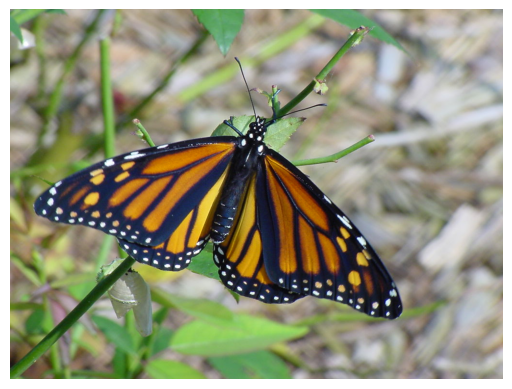

In [3]:
# Ruta del directorio que contiene las imágenes
filename = '0010001' + '.png'

# Extraer las características de la imagen
image_path = os.path.join(image_dir, filename)
print(image_path)

# Leer la imagen
img = cv2.imread(image_path)
# Convertir la imagen de BGR a RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
# Crear un diccionario para almacenar las características por especie
# species_features = {}

filename = '0010001' + '.png'

# Recorrer todos los archivos en el directorio de imágenes
# for filename in os.listdir(image_dir):
# Extraer las características de la imagen
#   image_path = os.path.join(image_dir, filename)
#   print(image_path)

species_info = {}
count = 0

for filename in os.listdir(image_dir):
  print(filename)
  image_path = os.path.join(image_dir, filename)
  species, image_num, features = extract_wavelet_features(image_path)
  count = count + 1

  if species not in species_info:
    species_info[species] = []
  
  species_info[species].append({'species': species, 'image_num': image_num, 'features': features})
  
print(count)


# # Agregar las características al diccionario de especies
# if species not in species_features:
#     species_features[species] = []
# species_features[species].append((image_num, features))

0050087.png
0090069.png
0040056.png
0070006.png
0030009.png
0070105.png
0060125.png
0090140.png
0080058.png
0040013.png
0090162.png
0090201.png
0040030.png
0070055.png
0020074.png
0050044.png
0020155.png
0080053.png
0080039.png
0010012.png
0030055.png
0040144.png
0100029.png
0060150.png
0080018.png
0050079.png
0070016.png
0090060.png
0050039.png
0070003.png
0070038.png
0080033.png
0050016.png
0070056.png
0080021.png
0060021.png
0030025.png
0020028.png
0060056.png
0100020.png
0060153.png
0020081.png
0010017.png
0020117.png
0020063.png
0030006.png
0060088.png
0100133.png
0050004.png
0100039.png
0080003.png
0050068.png
0070081.png
0020133.png
0070053.png
0080047.png
0090143.png
0010042.png
0040119.png
0010022.png
0030021.png
0090204.png
0050048.png
0070101.png
0090156.png
0100016.png
0080045.png
0010058.png
0060120.png
0040017.png
0040001.png
0020181.png
0030007.png
0040133.png
0070110.png
0090146.png
0010027.png
0020060.png
0050089.png
0030004.png
0020040.png
0050056.png
0010005.png
0100

In [26]:
import json

# Convertir la lista de características a un diccionario con una clave "features"
with open('species_info.json', 'w') as f:
    json.dump(species_info, f)

In [30]:
import csv

# Crear un archivo CSV para almacenar la información de cada especie
with open('species_info.csv', 'w', newline='') as f:
    writer = csv.writer(f)

    # Escribir la cabecera del archivo CSV
    writer.writerow(['species', 'image_num', 'features'])

    # Iterar sobre las especies en el diccionario
    for species in species_info:
        # Iterar sobre las imágenes de la especie
        for image_info in species_info[species]:
            # Escribir una fila en el archivo CSV con la información de la imagen
            writer.writerow([species, image_info['image_num'], *image_info['features']])

In [12]:
features = np.concatenate([img.ravel() for img in img], axis=0)

# Crear un diccionario para almacenar las características por especie
# Initialize an empty list to store flattened coefficients
flattened_coeffs = []

# Iterate over the elements of the coeffs tuple, flatten each, and append to the list
for img in img:
    flattened_coeffs.append(img.ravel())

# Concatenate the flattened coefficients into the features array
features = np.concatenate(flattened_coeffs, axis=0)



In [13]:
# all_features = []

# # Iterar sobre las imágenes en el directorio
# for filename in os.listdir(image_dir):
#     # Extraer las características de la imagen
#     image_path = os.path.join(image_dir, filename)
#     print(image_path)

#     # Leer la imagen
#     img = cv2.imread(image_path)
#     # Convertir la imagen de BGR a RGB
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#     # Aplanar los coeficientes de la DWT
#     flattened_coeffs = [img.ravel() for img in img]
#     # Concatenar los coeficientes a la lista de características
#     all_features.append(np.concatenate(flattened_coeffs, axis=0))

# # Convertir la lista de características a un arreglo de NumPy
# all_features = np.array(all_features)

/home/squispeb/university/ML-Classification-p/images/0050087.png
/home/squispeb/university/ML-Classification-p/images/0090069.png
/home/squispeb/university/ML-Classification-p/images/0040056.png
/home/squispeb/university/ML-Classification-p/images/0070006.png
/home/squispeb/university/ML-Classification-p/images/0030009.png
/home/squispeb/university/ML-Classification-p/images/0070105.png
/home/squispeb/university/ML-Classification-p/images/0060125.png
/home/squispeb/university/ML-Classification-p/images/0090140.png
/home/squispeb/university/ML-Classification-p/images/0080058.png
/home/squispeb/university/ML-Classification-p/images/0040013.png
/home/squispeb/university/ML-Classification-p/images/0090162.png
/home/squispeb/university/ML-Classification-p/images/0090201.png
/home/squispeb/university/ML-Classification-p/images/0040030.png
/home/squispeb/university/ML-Classification-p/images/0070055.png
/home/squispeb/university/ML-Classification-p/images/0020074.png
/home/squispeb/university

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (832,) + inhomogeneous part.

In [8]:
try:
    print(f"filename: {filename}")
    species = filename[:3]
    image_num = filename[3:-4]
    species, image_num
    print(f"species: {species}", f"image_num: {image_num}")
except ValueError:
    # Si el nombre del archivo no tiene el formato esperado, retornar None
    print(f"Error: no se pudieron extraer características de la imagen {filename}")

filename: 0010001.png
species: 001 image_num: 0001


In [10]:
# # Crear un diccionario para almacenar las características por especie
# species_features = {}

# filename = '0010001' + '.png'

# # Extraer las características de la imagen
# image_path = os.path.join(image_dir, filename)
# result = extract_wavelet_features(image_path, level=2)
# if result is None:
#     print(f"Error: no se pudieron extraer características de la imagen {filename}")
# else:
#     species, image_num, features = result
    
#     # Agregar las características al diccionario de especies
#     if species not in species_features:
#         species_features[species] = []
#     species_features[species].append((image_num, features))

In [11]:
try:
    print(f"filename: {filename}")
    species = filename[:3]
    image_num = filename[3:-4]
    species, image_num
    print(f"species: {species}", f"image_num: {image_num}")
except ValueError:
    # Si el nombre del archivo no tiene el formato esperado, retornar None
    print(f"Error: no se pudieron extraer características de la imagen {filename}")
  

# print(filename)
# species = filename[:3]
# image_num = filename[3:-4]
# print(f"species: {species}")
# print(f"image_num: {image_num}")

filename: 0010001.png
species: 001 image_num: 0001
